# Assume a beam has a normal type distribution
$ A = const \times e^{- \frac{\theta^2}{2B^2}}$

## to turn this to a normal distribution 
$const = \frac{1}{\sqrt{2\pi B^2)}}  \equiv \frac{1}{B\sqrt{2\pi}}$

## to maximum = 1 at the origin
$const =1$

In [1]:
import numpy as np
%pylab inline
def flux(theta,B):
    x=0.5*(theta/B)**2
    f=np.exp(-x)
    return f


Populating the interactive namespace from numpy and matplotlib


In [2]:
def fwhm2B(f):
    B=0.5*f/np.sqrt(2*np.log(2))
    return B


In [3]:
print fwhm2B(1.0)

0.42466090014400953


In [4]:
1.01728225945/0.432

2.354820045023148

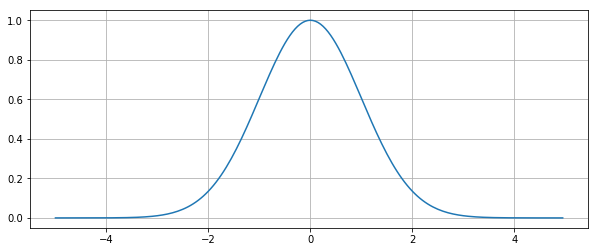

In [5]:
B=1.0 # for example only

pylab.figure(figsize=(10,4))
theta=np.arange(-5*B, 5*B, B/20.)
pylab.plot(theta,flux(theta,B))
pylab.grid()
pylab.show()

In [6]:
"""

Numerical checks for my derivation

"""

def deriv(pos,B,step=0.01):
    d=(flux(pos+step,B) -flux(pos-step,B))/(2*step)
    return d
print deriv(0,B), deriv(-B,B), deriv(B,B)

def deriv2(pos,B,step=0.01):
    d2=(deriv(pos+step,B) - deriv(pos-step,B))/(2*step)
    return d2

print deriv2(-B,B), deriv2(0,B), deriv2(B,B)

0.0 0.6065104423272405 -0.6065104423272405
-4.043106432982668e-05 -0.9999000066662767 -4.043106432982668e-05


In [7]:
print flux(1.177*B,B), flux(0,B)

0.5002413985344758 1.0


In [8]:
bhalf=B*np.sqrt(2*np.log(2)) #Full bandwidth half max =2*bhalf
print flux(bhalf,B), 2*bhalf

0.5 2.3548200450309493


# Derivative

$ A=   e^{- \frac{\theta^2}{2B^2}}$

substitue $ \frac{\theta^2}{2B^2}$ with $x$

$\frac{\partial A}{\partial \theta} = \frac {\partial A}{\partial x} \frac{\partial x}{\partial \theta}$

$ = -2e^{-x} {\frac{2 \theta}{2B^2}} $
$ = -\frac{\theta}{B^2}  e^{- \frac{\theta^2}{2B^2}}$

#Inflection point
$\frac{\partial^2 A}{\partial^2 \theta}  = 0 \Rightarrow \theta=B$

In [9]:
print np.sqrt(2*np.log(2))

1.1774100225154747


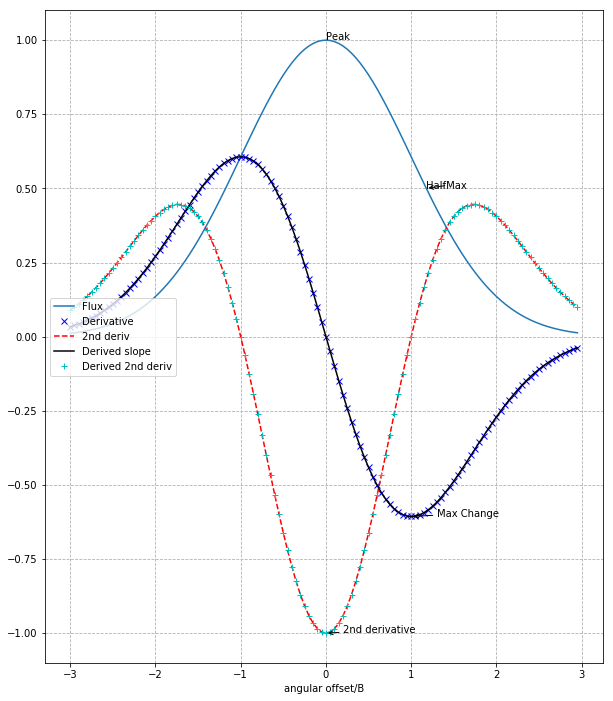

In [10]:
pylab.figure(figsize=(10,12))
theta=np.arange(-3*B, 3*B, B/20.)
pylab.plot(theta,flux(theta,B),label="Flux")
pylab.plot(theta,deriv(theta,B),'bx',label="Derivative")
pylab.plot(theta,deriv2(theta,B),'r--',label="2nd deriv")
pylab.annotate("Peak",(0,1))
pylab.annotate("HalfMax",(1.1774*B,0.5),textcoords='data', arrowprops=dict(arrowstyle="->"))
pylab.annotate("Max Change",(B,-0.6065/B),xytext=(B+0.3,-0.6065/B),textcoords='data',\
               arrowprops=dict(arrowstyle="->"))
pylab.annotate('2nd derivative',(0,-1.0/(B**2)), xytext=(0.2,-1.0/(B**2)),textcoords='data',\
               arrowprops=dict(arrowstyle="->"))
pylab.plot(theta,-theta*flux(theta,B)/B**2,'k-',label='Derived slope')
pylab.plot(theta,-(B**2-theta**2)*flux(theta,B)/B**4,'c+',label='Derived 2nd deriv')
pylab.grid(linestyle="--")
pylab.xlabel("angular offset/B")
pylab.legend(loc=6)
pylab.show()

In [11]:
print deriv(1.1774,1.0,0.001)
print deriv(0.9,1.0,0.001)
print deriv(1.0,1.0,0.001)
print deriv(1.1,1.0,0.001)

-0.5887067886949926
-0.6002789106707707
-0.6065304575357255
-0.6006816901002465


In [37]:
print flux(0,1.0), flux(0.1417,1.0), flux(1.1774,1.0), flux(1.1859,1.0)

1.0 0.990010782003679 0.5000059003147861 0.4950089652308424


In [40]:
print (1.1859-1.1774)/1.1774


0.00721929675556
0.51


In [59]:
print flux(1.0,0.84944)

0.5000964541327156


In [68]:
for x in np.linspace(0.007,0.0075,29):
    print x,flux(1+x,0.84944)

0.007 0.4952514796466283
0.007017857142857143 0.4952391372286936
0.007035714285714286 0.4952267948994927
0.007053571428571429 0.4952144526590339
0.007071428571428571 0.4952021105073263
0.007089285714285715 0.49518976844437845
0.007107142857142857 0.49517742647019913
0.007125 0.49516508458479674
0.007142857142857143 0.4951527427881803
0.007160714285714286 0.49514040108035834
0.007178571428571428 0.49512805946133964
0.0071964285714285715 0.4951157179311329
0.007214285714285714 0.4951033764897468
0.007232142857142857 0.4950910351371897
0.0072499999999999995 0.4950786938734709
0.007267857142857143 0.4950663526985988
0.007285714285714286 0.495054011612582
0.007303571428571428 0.4950416706154292
0.007321428571428572 0.49502932970714936
0.007339285714285714 0.4950169888877508
0.007357142857142857 0.49500464815724254
0.007375 0.4949923075156331
0.007392857142857143 0.494979966962931
0.007410714285714285 0.49496762649914533
0.0074285714285714285 0.49495528612428463
0.007446428571428571 0.494942

In [71]:
print flux(1.00736,0.84944)

0.4950026736486107


In [72]:
# if HPBW=1.0 
# then  shift to drop to 99% is 0.00736
print (1.00736-1.0)*60
# so 0.44 arcmin drops sensitvity by 1% at HPBW

0.4416
